# Pytorch Workflow

In [35]:
import torch
from torch import nn
import matplotlib.pyplot as plt

## 1. Data Preparing and Loading

1. get the data into numerical representations
2. build a model to learn patterns in the numerical representation

In [36]:
weight=0.7
bias=0.3

start=0
end=1
step=0.02
X=torch.arange(start,end,step).unsqueeze(dim=1)
y=weight*X+bias

X[:10],y[:10],len(X),len(y)

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]),
 50,
 50)

### Splitting data into training and test sets


In [37]:
trainsplit=int(0.8*len(X))
xtrain,ytrain=X[:trainsplit],y[:trainsplit]
xtest,ytest=X[trainsplit:],y[trainsplit:]

len(xtrain),len(xtest),len(ytrain),len(ytest)

(40, 10, 40, 10)

In [38]:
def plotpred(traindata=xtrain,trainlabels=ytrain,testdata=xtest,testlabels=ytest,predictions=None):
  plt.figure(figsize=(10,7))
  plt.scatter(traindata,trainlabels,c="b",s=4,label="Training Data")
  plt.scatter(testdata,testlabels,c="g",s=4,label="Testing Data")
  if predictions is not None:
    plt.scatter(testdata,predictions,c="r",label="Predictions")



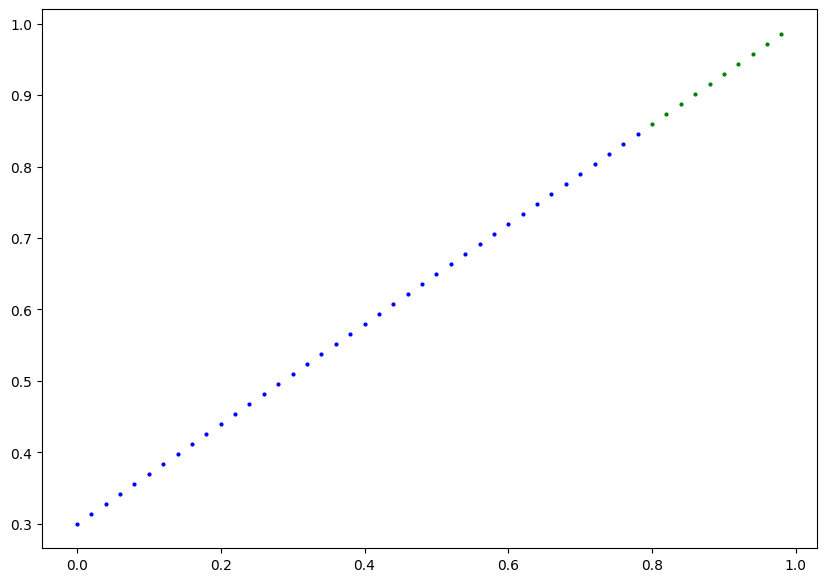

In [39]:
plotpred()

## 2. Build Model

In [40]:
class LinearRegression(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float))
    self.bias=nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float ))

  def forward(self,x:torch.Tensor)->torch.Tensor:
    return self.weights*x+self.bias


In [41]:
#Checking the contents of PyTorch model
torch.manual_seed(42)
model0=LinearRegression()
list(model0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [42]:
#list named parameters
model0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [43]:
#Making pred using torch.inference_mode()
with torch.inference_mode():
  ypreds=model0(xtest)
ypreds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

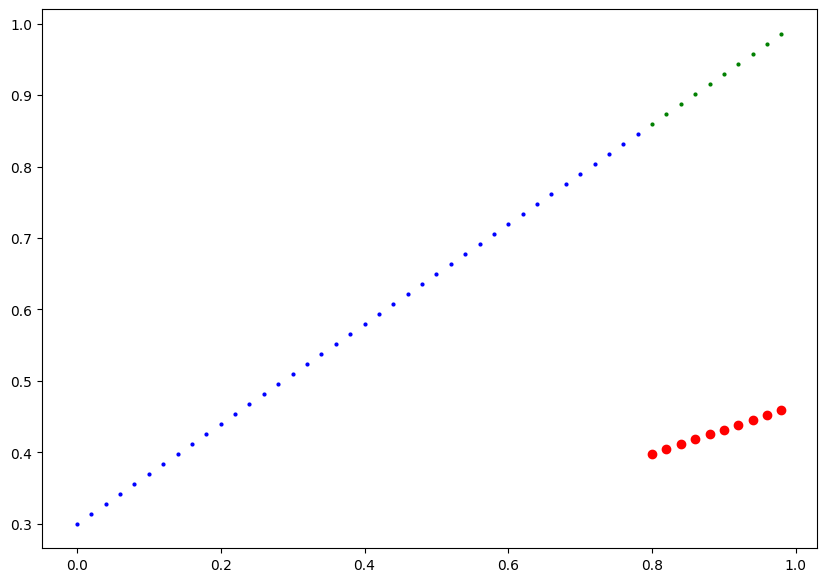

In [44]:
plotpred(predictions=ypreds)

In [45]:
#similar thing can be done with torch.no_grad() but torch.inference_mode() is preferred


 ## 3. Train model

In [46]:
#setup loss function
lossfn=nn.L1Loss()
#optimizer
optimizer=torch.optim.SGD(params=model0.parameters(),lr=0.01)

### Building a training loop in pytorch

In [47]:
epochs=100

for epoch in range(epochs):
  model0.train()
  #forward pass
  ypred=model0(xtrain)
  #calculate the loss
  loss=lossfn(ypred,ytrain)
  # print(f"Loss: {loss}")
  #optimizer
  optimizer.zero_grad()
  #back prop
  loss.backward()
  #Gradient descent
  optimizer.step()

  model0.eval() #turnsoff different settings not required for training/testing
  with torch.inference_mode():
    #forward pad\ss
    testpred=model0(xtest)
    #test loss
    testloss=lossfn(testpred,ytest)
  if epoch%10==0:
    print(f"Ephoc: {epoch} | Loss: {loss} | Test Loss: {testloss}")

  print(model0.state_dict())


Ephoc: 0 | Loss: 0.31288138031959534 | Test Loss: 0.48106518387794495
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
OrderedDict([('weights', tensor([0.3445])), ('bias', tensor([0.1488]))])
OrderedDict([('weights', tensor([0.3484])), ('bias', tensor([0.1588]))])
OrderedDict([('weights', tensor([0.3523])), ('bias', tensor([0.1688]))])
OrderedDict([('weights', tensor([0.3562])), ('bias', tensor([0.1788]))])
OrderedDict([('weights', tensor([0.3601])), ('bias', tensor([0.1888]))])
OrderedDict([('weights', tensor([0.3640])), ('bias', tensor([0.1988]))])
OrderedDict([('weights', tensor([0.3679])), ('bias', tensor([0.2088]))])
OrderedDict([('weights', tensor([0.3718])), ('bias', tensor([0.2188]))])
OrderedDict([('weights', tensor([0.3757])), ('bias', tensor([0.2288]))])
Ephoc: 10 | Loss: 0.1976713240146637 | Test Loss: 0.3463551998138428
OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])
OrderedDict([('weights', tensor([0.3835])), ('bias', tenso

In [48]:
with torch.inference_mode():
  y_prednew=model0(xtest)

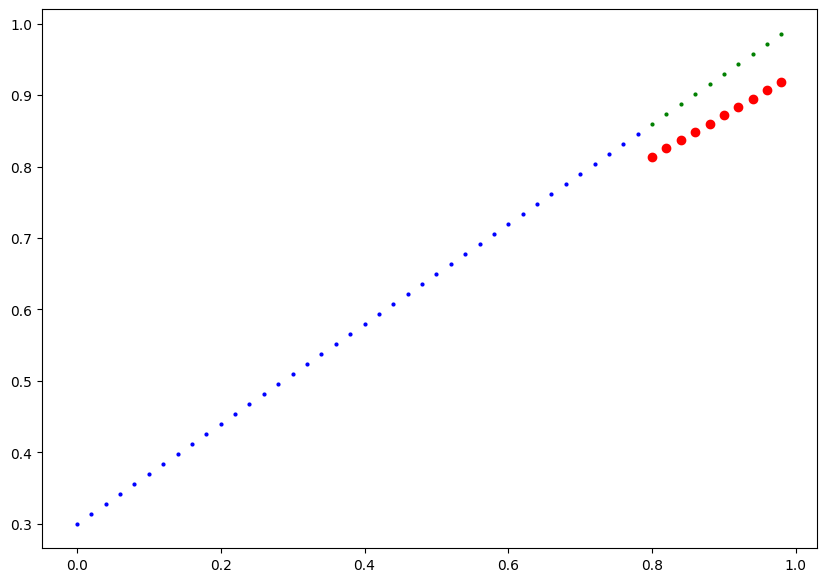

In [49]:
plotpred(predictions=y_prednew)

## Saving a model in pytorch

Three main methods about saving

1. `torch.save()` - allows to save a pytorch object in py pickle format
2. `torch.load()` - allows to load a savedd pytorch obj
3. `torch.nn.Module.load_state_dict()` - allows to load a model's saved state dictionary

In [50]:
model0.state_dict()

OrderedDict([('weights', tensor([0.5784])), ('bias', tensor([0.3513]))])

In [51]:
# Saving pytorch model
from pathlib import Path

# 1. Creating a directory
MODEL_PATH=Path('models')
MODEL_PATH.mkdir(parents=True,exist_ok=True)

#2. Create model save path
MODEL_NAME="01_Pytorch_Workflow.pth"
MODEL_SAVE_PATH=MODEL_PATH/MODEL_NAME

# 3. Save the model statedict
print(f"saving model to : {MODEL_SAVE_PATH}")
torch.save(obj=model0.state_dict(),f=MODEL_SAVE_PATH)


saving model to : models/01_Pytorch_Workflow.pth


## Loading a pytorch model

Since only statedict is saved, create a new instance of the model and load the statedict into it


In [52]:
loadedmodel0=LinearRegression()

#Load the saved statedict
loadedmodel0.load_state_dict(torch.load(MODEL_SAVE_PATH))

<All keys matched successfully>

In [53]:
loadedmodel0.state_dict()

OrderedDict([('weights', tensor([0.5784])), ('bias', tensor([0.3513]))])

In [54]:
loadedmodel0.eval()
with torch.inference_mode():
  loadedmodel0_preds=loadedmodel0(xtest)

In [55]:
model0.eval()
with torch.inference_mode():
  ypreds=model0(xtest)


In [56]:
ypreds==loadedmodel0_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

## all together

In [57]:
import torch
from torch import nn
import matplotlib.pyplot as plt


In [58]:
#device agnostic
device= "cuda" if torch.cuda.is_available() else "cpu"

In [59]:
#create some data
weight=0.7
bias=0.3

#create range values
start=0
end=1
step=0.02

X=torch.arange(start,end,step).unsqueeze(dim=1)
y=weight*X+bias


In [60]:
#Split data
train_split=int(0.8*len(X))
x_train,y_train=X[:train_split],y[:train_split]
x_test,y_test=X[train_split:],y[train_split:]

x_train.size(),x_test.size()


(torch.Size([40, 1]), torch.Size([10, 1]))

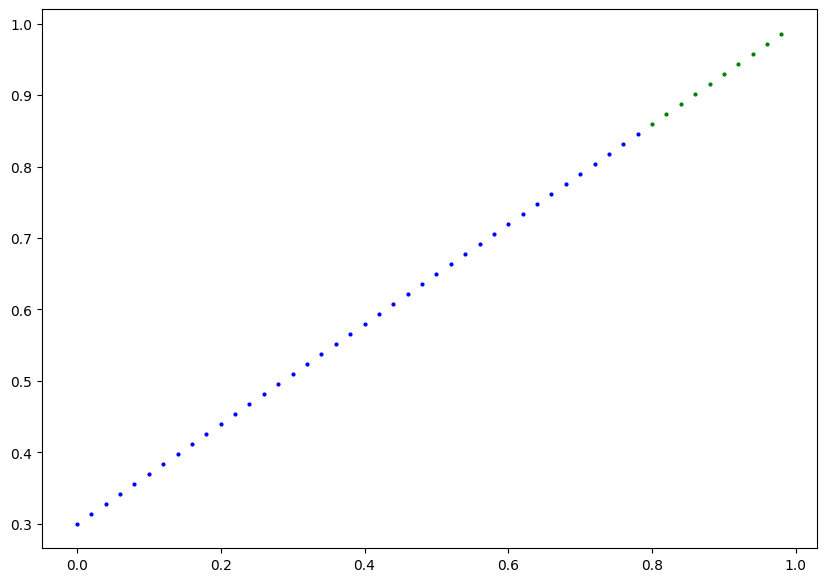

In [61]:
#plot the data
plotpred(x_train,y_train,x_test,y_test)

In [62]:
#Building a model
class LR(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear_layer=nn.Linear(in_features=1,out_features=1)
  def forward(self,x:torch.Tensor):
    return self.linear_layer(x)
torch.manual_seed(42)
model1=LR()
model1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
             ('linear_layer.bias', tensor([0.8300]))])

In [63]:
lossfn=nn.L1Loss()
optim=torch.optim.SGD(params=model1.parameters(),lr=0.01)

In [65]:
torch.manual_seed(42)
epochs=200
for epoch in range(epochs):
  model1.train()
  y_pred=model1(x_train)
  loss=lossfn(y_pred,y_train)
  optim.zero_grad()
  loss.backward()
  optim.step()

  model1.eval()
  with torch.inference_mode():
    test_pred=model1(x_test)
    test_loss=lossfn(test_pred,y_test)

  if epoch%10==0:
    print(f"Epoch: {epoch} | Loss: {loss} | Test loss : {test_loss}")


Epoch: 0 | Loss: 0.5551779866218567 | Test loss : 0.5739762187004089
Epoch: 10 | Loss: 0.4399680495262146 | Test loss : 0.4392663538455963
Epoch: 20 | Loss: 0.3247582018375397 | Test loss : 0.30455657839775085
Epoch: 30 | Loss: 0.20954827964305878 | Test loss : 0.16984674334526062
Epoch: 40 | Loss: 0.09433844685554504 | Test loss : 0.03513689711689949
Epoch: 50 | Loss: 0.023886386305093765 | Test loss : 0.04784906655550003
Epoch: 60 | Loss: 0.0199567973613739 | Test loss : 0.04580312222242355
Epoch: 70 | Loss: 0.016517987474799156 | Test loss : 0.0375305712223053
Epoch: 80 | Loss: 0.013089170679450035 | Test loss : 0.029944902285933495
Epoch: 90 | Loss: 0.009653178043663502 | Test loss : 0.02167237363755703
Epoch: 100 | Loss: 0.006215679459273815 | Test loss : 0.014086711220443249
Epoch: 110 | Loss: 0.002787243574857712 | Test loss : 0.005814164876937866
Epoch: 120 | Loss: 0.0012645035749301314 | Test loss : 0.013801807537674904
Epoch: 130 | Loss: 0.0012645035749301314 | Test loss : 0.

In [66]:
model1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]])),
             ('linear_layer.bias', tensor([0.3025]))])

In [67]:
weight,bias


(0.7, 0.3)

In [68]:
#making pred
model1.eval()
with torch.inference_mode():
  y_preds=model1(x_test)


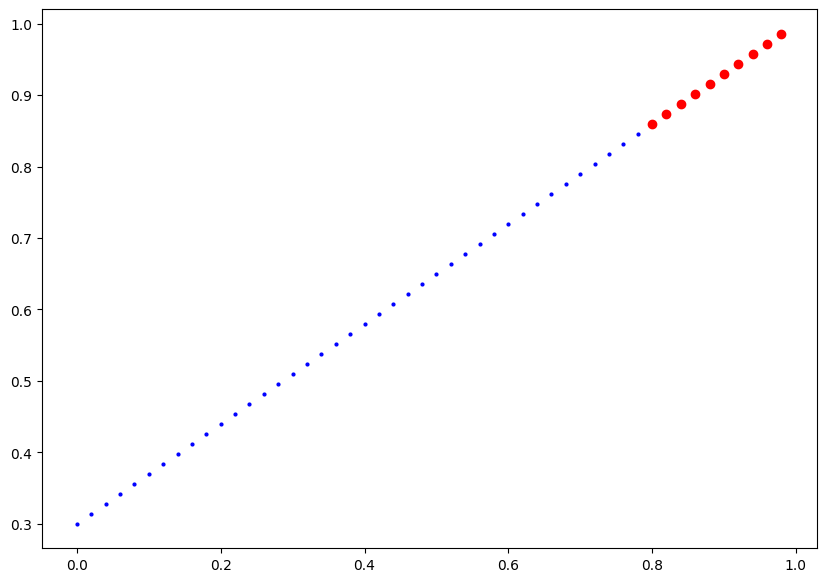

In [69]:
plotpred(predictions=y_preds)

In [76]:
from pathlib import Path
MODEL_PATH=Path("models")
MODEL_NAME="01_pytorch_workflow_1.pth"
MODEL_SAVE_PATH=MODEL_PATH/MODEL_NAME


In [77]:
torch.save(obj=model1.state_dict(),f=MODEL_SAVE_PATH)

In [79]:
#load the model
loadedmodel1=LR()
loadedmodel1.load_state_dict(torch.load(MODEL_SAVE_PATH))

<All keys matched successfully>

In [81]:
#Evaluate
loadedmodel1.eval()
with torch.inference_mode():
  loadedmodel1preds=loadedmodel1(xtest)
ypreds==loadedmodel1preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])